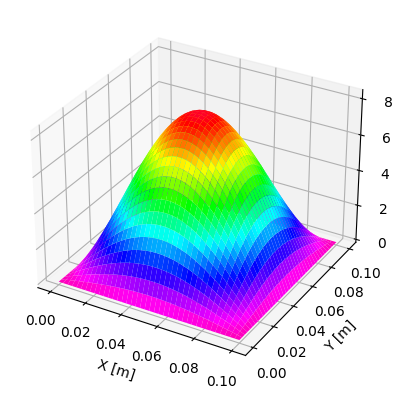

In [28]:
# 2D Transient Heat Equation for steel plate solver via finite-difference scheme
# Author: Leonardo Antonio de Araujo
# E-mail: leonardo.aa88@gmail.com
# Date: 08/04/2020

import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

# Physical parameters
k = 1.172E-5 # steel, 1% carbon
Lx = 0.1 # length
Ly = 0.1 # width

# Numerical parameters
nx = 40 # number of points in x direction
ny = 40 # number of points in y direction
dt = 0.1 # time step
tf = 1000 # final time

# Boundary conditions (Dirichlet)
T0=10; # internal field
T1=0;
T2=0;
T3=0;
T4=0;

# Computes cell length
dx = Lx/nx;
dy = Ly/ny;

# Courant numbers
r1 = k*dt/(dx**2);
r2 = k*dt/(dy**2);

if (r1 > 0.5 or r2 > 0.5):
	raise TypeError('Unstable Solution!')

T = np.zeros((nx,ny,int(tf/dt)))

# Initial condition
for i in range(0,nx-1):
	for j in range(1,(ny-1)//8):
		T[i,j,0] = T0

# Boundary conditions set-up
for i in range(0,nx):
	T[i,0,0]=T1
	T[i,ny-1,0]=T2

for j in range(0,ny):
	T[0,j,0]=T3
	T[nx-1,j,0]=T4

# Generate 2D mesh
X = np.linspace(0, Lx, nx, endpoint=True)
Y = np.linspace(0, Ly, ny, endpoint=True)
X, Y = np.meshgrid(X, Y)

# Main time-loop
for t in range (0,int(tf/dt)-1):
	for i in range(1,(nx-1)):
		for j in range (1,(ny-1)):
			a=(T[i+1,j,t]-2*T[i,j,t]+T[i-1,j,t])/dx**2 # d2dx2
			b=(T[i,j+1,t]-2*T[i,j,t]+T[i,j-1,t])/dy**2 # d2dy2
			T[i,j,t+1]=k*dt*(a+b)+T[i,j,t]

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
# img[X, Y] = T[:,:,int(tf/dt)-1
ax.plot_surface(X, Y, T[:,:,int(tf/dt)-1], cmap = 'gist_rainbow_r', edgecolor = 'none')
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_zlabel('T [°]')
plt.show()